## COVID-19 Global Data Tracker
*This notebook tracks global COVID-19 trends using data from Our World in Data.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

2. Data importation and display

In [9]:
df = pd.read_csv('dataset/owid-covid-data.csv')
print(df.columns)
df.head()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


2. Data Cleaning

In [3]:
df['date'] = pd.to_datetime(df['date'])
countries = ['Kenya', 'United States', 'India']
df_clean = df[df['location'].isin(countries)].copy()
df_clean.fillna(method='ffill', inplace=True)
df_clean.head()

C:\Users\sjemn\AppData\Local\Temp\ipykernel_4956\1331977705.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.fillna(method='ffill', inplace=True)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
120683,IND,Asia,India,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
120684,IND,Asia,India,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
120685,IND,Asia,India,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
120686,IND,Asia,India,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
120687,IND,Asia,India,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


3. Exploratory Data Analysis (EDA)

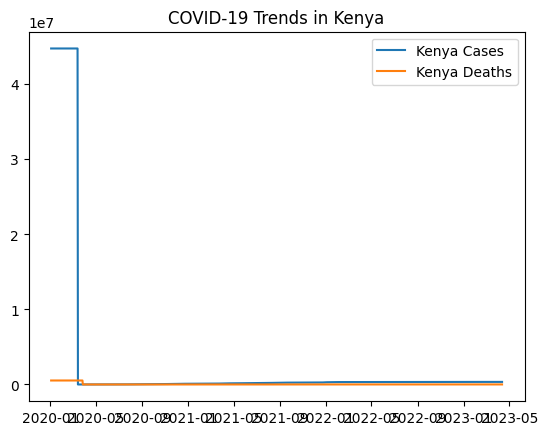

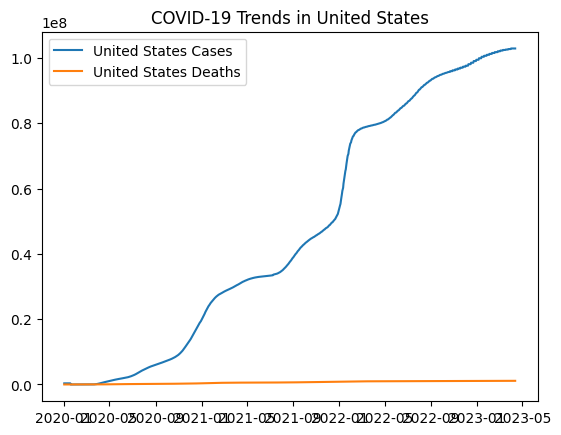

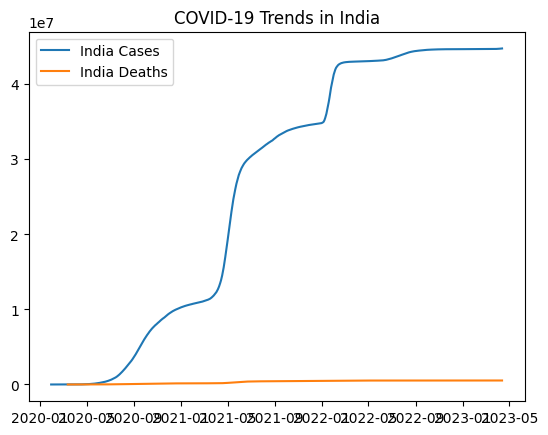

In [4]:
for country in countries:
    subset = df_clean[df_clean['location'] == country]
    plt.figure()
    plt.plot(subset['date'], subset['total_cases'], label=f"{country} Cases")
    plt.plot(subset['date'], subset['total_deaths'], label=f"{country} Deaths")
    plt.legend()
    plt.title(f"COVID-19 Trends in {country}")
    plt.show()

4. Vaccination Progress

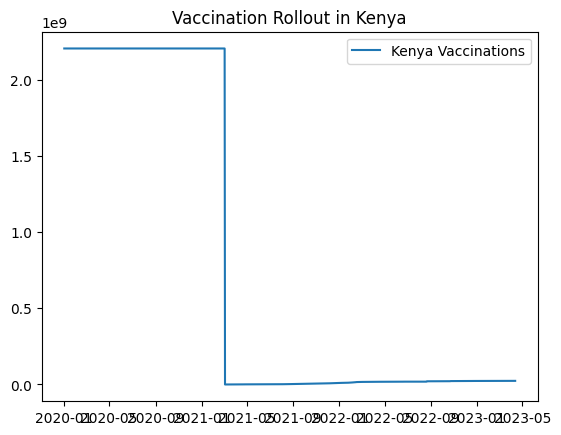

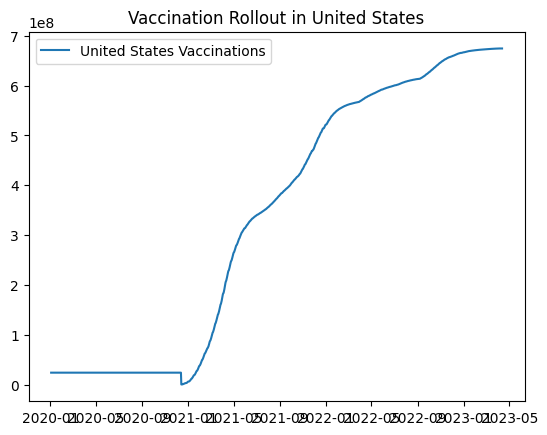

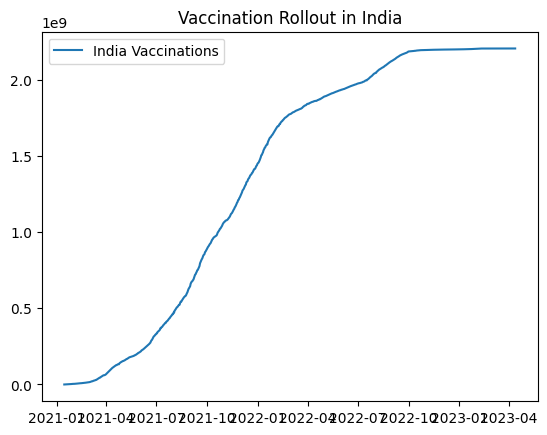

In [5]:
for country in countries:
    subset = df_clean[df_clean['location'] == country]
    plt.figure()
    plt.plot(subset['date'], subset['total_vaccinations'], label=f"{country} Vaccinations")
    plt.legend()
    plt.title(f"Vaccination Rollout in {country}")
    plt.show()

5. Choropleth Map
*Requires plotly.

In [7]:
import plotly.express as px
latest = df.groupby('iso_code').last().reset_index()
fig = px.choropleth(latest, locations='iso_code', color='total_cases', hover_name='location')
fig.show()

6. Insights & Reporting

In [6]:
latest_summary = df_clean[df_clean['date'] == df_clean['date'].max()]
for country in countries:
    data = latest_summary[latest_summary['location'] == country]
    cases = int(data['total_cases'])
    deaths = int(data['total_deaths'])
    vac = int(data['total_vaccinations'])
    print(f"{country}: Total Cases={cases}, Total Deaths={deaths}, Total Vaccinations={vac}")

Kenya: Total Cases=342992, Total Deaths=5688, Total Vaccinations=23750431
United States: Total Cases=102873924, Total Deaths=1118800, Total Vaccinations=674375206
India: Total Cases=44768172, Total Deaths=531000, Total Vaccinations=2206596918


C:\Users\sjemn\AppData\Local\Temp\ipykernel_4956\1530600435.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  cases = int(data['total_cases'])
C:\Users\sjemn\AppData\Local\Temp\ipykernel_4956\1530600435.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  deaths = int(data['total_deaths'])
C:\Users\sjemn\AppData\Local\Temp\ipykernel_4956\1530600435.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  vac = int(data['total_vaccinations'])
